<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP5611M An Unfair Coin - Maximum Likelihood and Bayesian Approach</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## An Unfair Coin - Maximum Likelihood and Bayesian Approach

### Learning Outcomes

The purpose of this notebook is to provide a basic demonstration of Bayesian inference. **At the end of this notebook there are exercises**

At the end of this notebook you should be able to
- simulate coin throwing with a Bernoulli process
- perform maximum likelihood estimates of $\mu$, the parameter controlling the Bernoulli process
- perform Bayesian inference of $\mu$
- explain why Bayesian inference is incapable of overfitting the data for this model
- explain what a Bayesian confidence interval is
- explain how a prior can incorporate hard constraints


### Introduction

Imagine that we are predicting a series of coin tosses. We model this with a Bernoulli process. A stochastic variable governed by a Bernouilli process has two possible outcomes: $\{ 0, 1 \}$ (we may associate 0 with 'head' and 1 with 'tails'. If we toss a coin we model this with a probability for the outcome:
$$
P(x = 1) = \mu
$$

$P(x = 0)$ follows from:

$$
P(x= 0) = 1 - P(x=1)
$$

If $\mu = 0.5$ the coin is fair and if we throw $N=100$ times we may get a sequence of heads and tails. The individual elements of the throw may be unpredictable, but we expect approximately 50 heads and 50 tails.
If we were to see 25 heads and 75 tails we would have a hard time believing $\mu = 0.5$ and might guess it is closer to $\mu = 0.25$.

### Problem

We are given the information that $\mu$ can have five possible values:0., 0.25, 0.5, 0.75, 1.0. We are given a limited number of observations of coin throws, say $N$. On the basis of these observations we need to model a possible future sequence of coin throws. We will use two approaches: maximum likelihood and Bayesian.

### Maximum Likelihood
We note down our observed series of outcome and write down the probability for that particular sequence as a function of $\mu$. We can do this because i) we have been given the probability of an individual outcome according to $P(x = 1 \mid \mu ) = \mu; P(x= 0\mid \mu) = 1-  P(x = 1 \mid \mu)$ and the fact that the outcome of individual
coin tosses are independent and that therefore we are allowed to multiply probabilities of individual outcomes to arrive at the probability of a series.

Given a series of $N = 5$ tosses. Imagine the outcome of the first toss to be 1, the other four to be 0:
$$
10000
$$
The probability for this particular outcome is:
$$
\mu(1-\mu)^4
$$
The probability for outcome:
$$
01000
$$
is also:
$$
\mu(1-\mu)^4
$$
It is not hard to see that for an observed series of $N$ tosses, with a number of $N_1$ observed 1s in the series
and therefore a number of $N_0 = N - N_1$ 0s the probability of these outcomes is:
$$
\mathcal{L} = \mu^{N_{1}}(1- \mu)^{N-N_1},
$$
regardless of the particular order in which these 1s and 0s occured.

In the Maximum Likelihood approach, we consider the expression above as a likelihood, i.e. as a function of its parameters. There is only one parameter, which is $\mu$. We aim to find the value for $\mu$, which maximizes
$\mathcal{L}$. It is often easier to work with the log likelihood:
$$
\ln \mathcal{N} = N_1 \ln \mu + (N - N_1) \ln (1 - \mu)
$$
The maximum value of $\mathcal{L}$ is the minimum value of $\ln \mathcal{L}$, so differentiate and equate to 0
to find the value of $\mu$ for which this minimum is achieved:
$$
\frac{N_1}{\mu} - \frac{(N - N_1)}{1 - \mu} = 0
$$
This leads to:
$$
N_1(1 - \mu) = (N - N_1) \mu
$$
and ultimately to 
\begin{equation}
\mu = \frac{N_1}{N}
\end{equation}

The second derivative is:
$$
-\frac{N_1}{\mu^2} - \frac{(N - N_1)}{(1 - \mu)^2}
$$
Since $N - N_1 > 0$ and $N >0$, this term is negative. Therefore $\mu = \frac{N_1}{N}$ is a minimum of the log likelihood, moreover it is the only minimum. We conclude that this value of $\mu$ maximises the likelihood.

Intuitively, this estimate for $\mu$ makes sense.

### Bayesian Approach

The Bayesian approach requires us to make assumptions about the prior values of $\mu$. In the Bayesian view, probability corresponds to a subjective degree of believe. We know that $\mu$ can only assume five values, and we must define a probability distribution over these values, the *prior* distribution. We could, for example,
assume that our opponent is most likely to be fair, but allow for some probability that the coin is unfair
in their advantage:

\begin{align}
P_{prior}(\mu = 0. )   & = 0.05 \\
P_{prior}(\mu = 0.25)  & = 0.05 \\
P_{prior}(\mu = 0.50 ) & = 0.7 \\
P_{prior}(\mu = 0.75 ) & = 0.15 \\
P_{prior}(\mu = 1.0 )  & = 0.05
\end{align}

Our objective is to reassess these probabilities in light of a sequence of coin tossess that we have observed.
Bayes' rule gives us:
$$
P(\mu \mid D ) = \frac{P(D \mid \mu)}{P(D)} P_{prior}(\mu)
$$
Here $P(D \mid \mu)$ is simply the likelihood of the data as defined above:
$$
P(D \mid \mu) = \mu^{N_1}(1 - \mu)^{N - N_1},
$$
given $\mu$ it gives the probability of the observation of a particular sequence, which can be sumarised in the only two numbers that are relevant: the number of 0 outcomes, $N0$, and the number of 1 outcomes $N_1$, from which we can compute $N= N_0 + N_1$.
Given a sequence of observations, we have the numbers to compute the posterior probabilities $P(\mu \mid D)$.

#### The complication of normalisation
Please note the following: it is relatively straightforward to calculate a given posterior probability for a single $\mu$-value *up to a normalisation factor*:
$$
P_{posterior}(\mu = 0.5) \sim P( D \mid \mu)P_{prior}(\mu = 0.5)
$$
This is a lightweight calculation, given the simple form of the likelihood and that we know the prior. But to normalise properly we need to calculate $\sum_\mu P(D \mid \mu)P(\mu)$ directly, or alternatively estimate
the posteror probabilities for *all possible outcomes* and use that to normalise the posterior distribution.

We will demonstrate both options below. Either way to calculate the posterior probability for one outcome, we must calculate all outcomes. Even on a small table like this, just calculating an overall normalisation constant requires most of the work. For a large number of outcomes and a multivariate likelihood distribution this problem can be substantial. By working with parameterised distributions, like a Gaussian, this problem can sometimes be avoid. The main text will discuss this in greater detail.
 


### Example 1: A large number of observations for $\mu = 0.75$. Maximum likelihood estimation and posterior distribution.

#### Data sample
We use the Binomial distribution $N =1$, $p = 0.75$ to generate a sample of 100 observations of 
$\mbox{Ber}( x \mid \mu = 0.75)$.

#### Maximum Likelihood estmation

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 200
import numpy as np

from numpy.random import default_rng
rng = default_rng()

N_bin  = 1 # binomial for N=1 is Bernouilli
p    = 0.75
size = 100
sample = rng.binomial(N_bin, p, size)

print(sample)

n_ones = sample.sum() # the sum is adequate for a total count

mu_ml = float(n_ones)/size

print('mu_ml = ', mu_ml)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
mu_ml =  0.86


#### Comment
1. This is a reasonable estimate of the original $\mu$. Please bear in mind that the modeler only sees the data, not how it is generated. To perform prediction, the modeller would use similar code (not knowing how the sample was  created), using $p = \mu_{ml}$

2. This is a *point* estimate of $\mu$. Repeating the cell will give a spread in results which will be more informative.

3. Experiments with real data often cannot be repeated at will. When this is the case the maximum likelihood estimate will remain a point estimate.

#### Posterior Distribution


If the prior is a proper probability distribution function, it should be normalised: 1.0


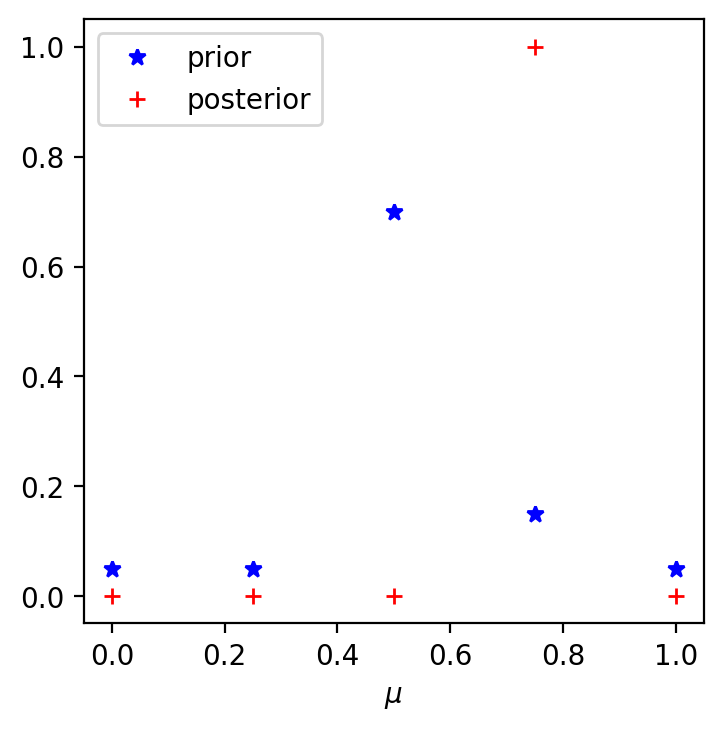

In [ ]:
import matplotlib.pyplot as plt

mu_values = np.array([0., 0.25, 0.5, 0.75, 1.])
prior   = np.array([0.05, 0.05,   0.7, 0.15,  0.05])

print('If the prior is a proper probability distribution function, it should be normalised:', prior.sum())

# we use the same sample as generated above that was used for the ML estimate

ones  = n_ones
zeros = size - ones

def likelihood(mu, ones, zeros):
    # multiply performs element wise multiplication
    return np.multiply(np.power(mu,ones),np.power(1-mu,zeros))

llh = likelihood(mu_values,ones,zeros)
posterior = np.multiply(llh,prior)
normalised_posterior = posterior/posterior.sum()

plt.plot(mu_values, prior,'b*',label='prior')
plt.plot(mu_values,normalised_posterior,'r+',label='posterior')
plt.xlabel('$\mu$')
plt.legend()
plt.savefig('falsecoin.pdf')

#### Comment

1. The posterior probability peaks at 0.75
2. In the numerical values as printed the original prior is only present as a shadow.
3. This model expresses complete confidence in the model that $\mu = 0.75$.
4. A model can predict series accordingly
5. For simplicity we specified the prior only on five different possible values. The likelihood estimate can take on any value. This means that we are not comparing like with like. We will remedy this below, when we will provide a continuous prior distribution.

### Example 2: A small number of observations $N=3, p = 0.75$.

Here we assume that the sample '111' has been generated. This is not implausible given only three observations.
Below we will repeat the experiment with randomly generated samples. Here, we want to see how the maximum likelihood and Bayesian methods deal with sequences that are not representative, but still possible.



In [ ]:
sample = np.array([1,1,1])
print(sample)

size=3
n_ones = sample.sum() # the sum is adequate for a total count

mu_ml = float(n_ones)/size

print('mu_ml = ', mu_ml)

[1 1 1]
mu_ml =  1.0


#### Comment

1. The maximum likelihood method arrives again at a point estimate
2. There is no opportunity to express uncertainty about this model
3. Predictions based on this estimated will be continuous strings of '1'
4. Clearly the advise would be here: 'use more data'. This is not always possible.

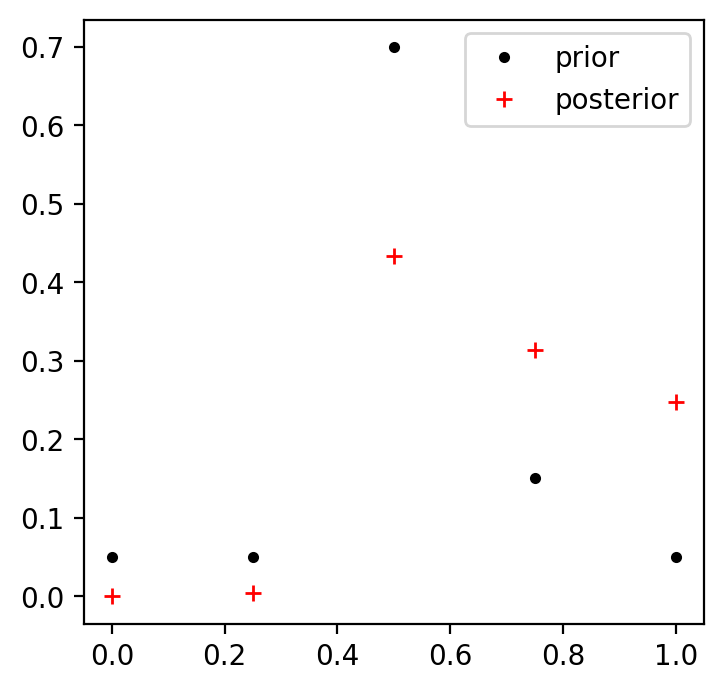

In [ ]:
# For Bayes method, all we need to do is adapt the likelihood of the data to the observed sequence.
# The prior is not affected by definition and the calculation of the posterior is the same
ones  = 3
zeros = 0


llh = likelihood(mu_values,ones,zeros)
posterior = np.multiply(llh,prior)
normalised_posterior = posterior/posterior.sum()

plt.plot(mu_values,prior,'k.',label='prior')
plt.plot(mu_values,normalised_posterior,'r+', label='posterior')
plt.legend()

#### Comment
1. The posterior distribution has shifted towards higher values of $\mu$ compared to the prior.
2. The posterior distribution is quite broad, representing uncertainty about the model.
3. It can be used for predictive sequences: use $\mu = 0.5$, $\mu = 0.75$ and $\mu =1.$ to generate 
predictive seuquences. Let the number of sequences generated by each of the model be proportional to the posterior
probability of the model parameter. This leads to much better predictive sequences.

#### Repeat Experiment
Below the slider can be used to select how large a sample should be considered. Every time the slider is moved a completely new sample is generated of the desired size. In general, from sample size $N=10$ onwards, the posterior peak is at the true value. You can also experiment with different values of $\mu$ (by changing $p$!), but you have to rerun the cell before you can start manipulating the slider.

In [ ]:
matplotlib inline
from ipywidgets import interactive

N=1
p=0.75
size = 100


def plotPosterior(samplesize):
    sample = rng.binomial(N,p,samplesize)
    ones = sample.sum()
    zeros= samplesize - ones
    
    llh = likelihood(mu_values,ones,zeros)
    posterior = np.multiply(llh,prior)
    normalised_posterior = posterior/posterior.sum()

    plt.plot(mu_values,prior,'k.',label='prior')
    plt.plot(mu_values,normalised_posterior,'r+', label='posterior')
    plt.legend()
    plt.show()
    
interactive_plot = interactive(plotPosterior, samplesize=(0, 50))
interactive_plot

interactive(children=(IntSlider(value=25, description='samplesize', max=50), Output()), _dom_classes=('widget-…

### Continuous Prior distributions

#### Introduction

In the example above, to illustrate the application of Bayes' rule to a table of conditional probabilities, we restricted the value of the $\mu$ variable to a number of discrete values. This demonstrates how simple the application of Bayes' rule really is, but a purist might complain that the maximum likelihood can take on any value, whereas the prior and posterior distribution are only defined on a small number of values, and therefore
we are not comparing like with like.

The continuous version is not fundamentally different, although it requires continuous prior and posterior
distributions over the interval $[0,1]$, thereby covering all values take $\mu$ could take potentially.
For continuous variables Bayes' rule is as follows:
$$
p(\mu \mid \mathcal{D} ) = \frac{p(\mathcal{D} \mid \mu)} {p(\mathcal{D})},
$$
where
$$
p(\mathcal{D}) = \int^1_0 p(\mathcal{D} \mid \mu )p(\mu) d \mu
$$

The main difference is that we now have to pick a continuous prior distribution. We could pick many, bearing in mind that it is supposed to express a prior belief about the value of the coin. If we firmly believe that $\mu = 0.5$ we should pick a prior that is sharply peaked around that value. If we are not firm in our belief, we could take a broader peak. If we believe the coin if false, we can take a value closer to 0 or 1.

As a functional form for the prior we use Beta function:
$$
\mbox{Beta}(\mu \mid a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{a-1} (1-\mu)^{b-1}
$$

The Gamma functions are a normalisation factor, which we will not discuss in detail here, but can easily be calculated using numpy. The functional dependence is reminiscent of the likelihood. Remember that
for $N$ observations of which $N_1$ were '1' the likelihood is given by:
$$
p(\mathcal{D} \mid \mu)  = \mu^{N_1}(1 - \mu)^{N - N_1}
$$
Note the following:
1. The likelihood and the prior have a very similar form. This is deliberate: the computation of the posterior is very simple.
2. By picking variables $a$ and $b$ appropriately, we have great freedom in picking the shape of the prior. Helpful in this regard are the following relations:

\begin{align}
\mathbb{E}(\mu) &= \frac{a}{a+b} \\
\mbox{var}(\mu) &= \frac{ab}{(a+b)^2(a+b+1)}
\end{align}

For example, the formula for the expectation shows that if you want your distribution to peak at $\mu =0.5$, you have to pick $a = b$.

We show the great variety of shapes that can be picked by selecting $a$ and $b$ appropriately:

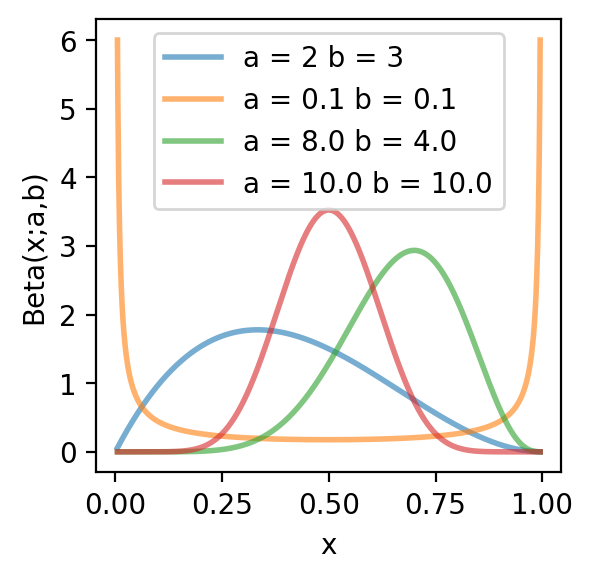

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 200

from scipy.stats import beta
pairs = [(2,3),(0.1,0.1),(8.,4.),(10.,10.)]
x = np.linspace(0.005, 0.995, 1000)
for pair in pairs:
    plt.plot(x, beta.pdf(x, pair[0], pair[1]),'-', lw=2, alpha=0.6, label='a = '+str(pair[0])+' b = '+str(pair[1]))
plt.legend()

plt.xlabel('x')
plt.ylabel('Beta(x;a,b)')
plt.savefig('beta.pdf')

Multiplying likelihood and prior, we obtain the posterior:
$$
p(\mu  \mid \mathcal{D} ) \sim \mu^{N_1 + a -1} ( 1 - \mu)^{N-N_1 + b - 1}
$$
Note:
1. The posterior is again a Beta function. The calculations shown here are greatly facilitated by a prior that plays nicely with the likelihood.
2. The normalisation factor that isn't shown here can easily be calculated:
$$
\frac{\Gamma(N +a + b )}{\Gamma(N_1 + a ) \Gamma(N - N_1 + b )}
$$

3. Using the formula for the expectation we can calculate that:
$$
\mathbb E[{\mu}]_{posterior} = \frac{N_1 + a}{a + b + N}
$$

4. In the limit of an infinite number of observations this is equal to $\frac{N_1}{N}$. In this limit the *posterior will peak sharply around the maximum likelihood estimate*.

5. For a finite amount of data, the expectation value of the posterior represents a compromise between the
(expectation of) the prior distribution and the maximum likelihood estimate.

6. Since the parameters $a$ and $b$ essentially reflect the counts of the number of outcomes for $x=1$, $N_1$ and the total number of observations, $N$, the choice of prior can here be seen to be equivalent to artificially picking a number of prior observations by the modeller.

7. We will later see that whilst the prior will generally be chosen such that prior times likelihood will result in the posterior having the same functional form as the prior, the prior usually does not have the same functional form as the likelihood.

We finish with a number of examples:

#### $\mu = 0.75$ $N=3$; prior $a=10, b= 10$, which corresponds to a prior that peaks around $\mu = 0.5$

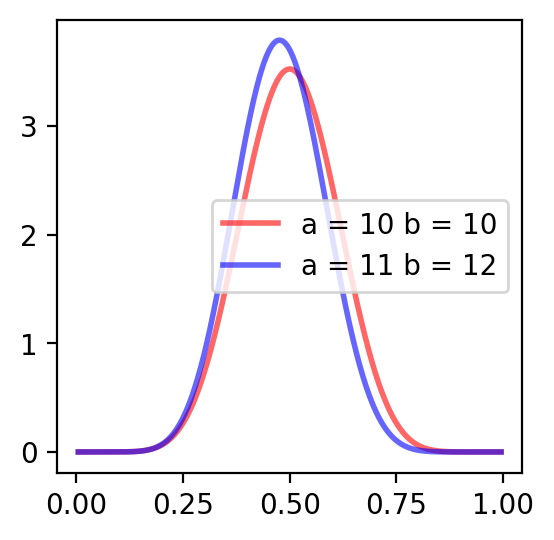

In [4]:
def aAndbFromSample(mu, size, a_prior, b_prior):
    N_bin = 1 # use binomial to sample Bernouilli    
    sample = rng.binomial(N_bin, mu, size)
    N=len(sample)
    N_1 = sample.sum()
    a = a_prior + N_1
    b = b_prior + N - N_1
    return a, b

def plotPriorAndPosterior(mu, size, a_prior, b_prior):
    a_post, b_post = aAndbFromSample(mu,size, a_prior, b_prior)   
    plt.plot(x, beta.pdf(x, a_prior, b_prior),'-', lw=2, color='r', alpha=0.6, label='a = '+str(a_prior)+' b = '+str(b_prior))    
    plt.plot(x, beta.pdf(x, a_post,  b_post), '-', lw=2, color='b', alpha=0.6, label='a = '+str(a_post) +' b = '+str(b_post))
    plt.legend()

mu = 0.75
a_prior = 10
b_prior = 10
N = 3 
plotPriorAndPosterior(mu, N, a_prior, b_prior)

plt.savefig('posteriormu1.pdf')

#### $\mu = 0.75$ $N=100$; prior $a=10, b= 10$, which corresponds to a prior that peaks around $\mu = 0.5$

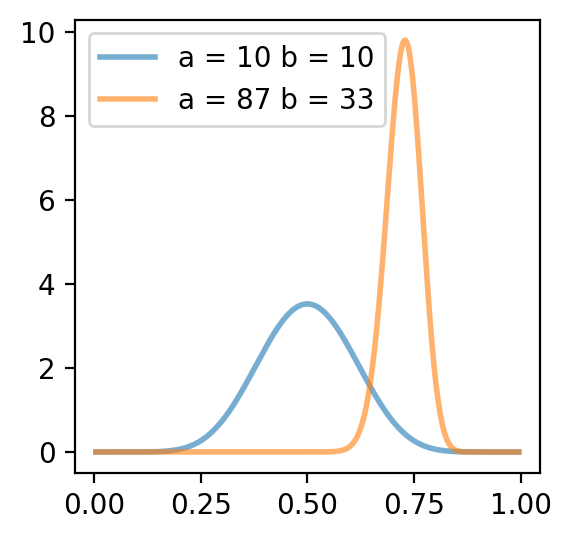

In [ ]:
N = 100
plotPriorAndPosterior(mu, N, a_prior, b_prior)
plt.savefig('posteriormu2.pdf')

#### $\mu = 0.75$ $N=10000$; prior $a=10, b= 10$, which corresponds to a prior that peaks around $\mu = 0.5$

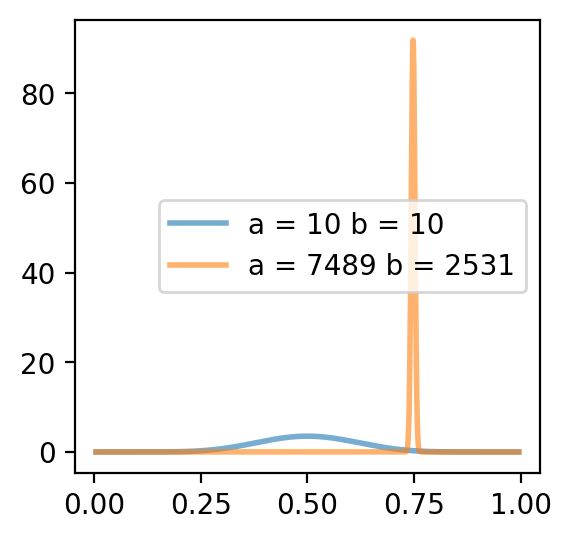

In [ ]:
N = 10000
plotPriorAndPosterior(mu, N, a_prior, b_prior)
plt.savefig('posteriormu3.pdf')

### $\mu = 0.1$ $N=100$; prior $a=10, b= 10$, which corresponds to a prior that peaks around $\mu = 0.5$

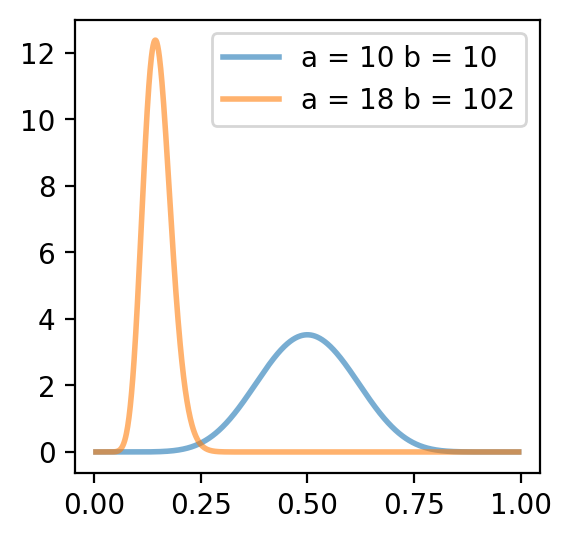

In [ ]:
mu=0.1
N = 100
plotPriorAndPosterior(mu, N, a_prior, b_prior)
plt.savefig('posteriormu4.pdf')

**Exercise 1**  Simulate 100 events of a Bernoulli process with $\mu = 0.3$.

In [ ]:
# sample answer!
sample = np.random.binomial(1,0.2,size=100)
print(sample)

[1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0]


**Exercise 2**  Start with a beta prior $a=5, b=5$. Infer the posterior on the data you just generated.

In [ ]:
# sample answer!
import scipy.integrate as integrate

N_1=sample.sum()
print(N_1)
N=len(sample)
a_prior = 5
b_prior = 5
a_post = a_prior + N_1
b_post = b_prior + N - N_1
print(a_post,b_post)


24
29 81


**Exercise 3** Determine the maximum of your posterior, $\mu_{MAP}$. Determine the value of $\mu_l < \mu_{map}$ so that the interval $[\mu_l, \mu_{MAP} ]$ contains 45% of the probability mass. It is easiest to use the numpy function *quad* to perform integration
numerically:
https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

Do the same for the value of $\mu_h > \mu_{MAP}$. The interval $[\mu_l, \mu_h]$ is a Bayesian confidence interval that contains 90 \% of the data.

9.516835736222047 (array([257]),) [0.25968468]
0.2596846846846847
E_mu =  0.2636363636363636
Lower interval =  0.19734404993645036
Higher interval =  0.3348359983214453
(0.9999999999999972, 3.695607758881579e-09)
(0.44758575885640695, 4.969200149767061e-15)
(0.4594868835651305, 5.1013291764726634e-15)


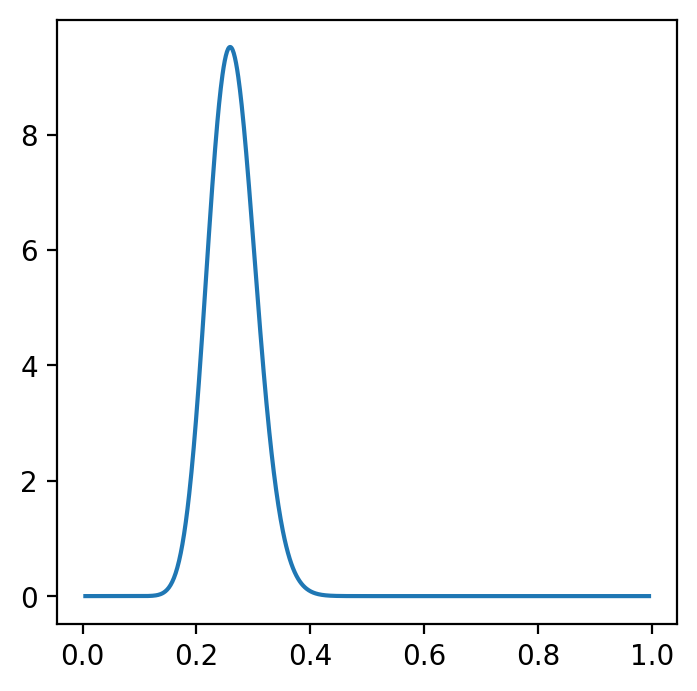

In [ ]:
#! sample answer
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
x = np.linspace(0.005, 0.995, 1000)
y = beta.pdf(x, a_post, b_post)
plt.plot(x,y)
print(y.max(),np.where(y==y.max()),x[np.where(y==y.max())[0]])
mu_max=x[np.where(y==y.max())[0]][0]
print(mu_max)
emu = a_post / (a_prior+b_prior+N)
print("E_mu = ", emu)
mu_l = beta.ppf(0.05,a_post,b_post)
print("Lower interval = ", mu_l)
mu_h = beta.ppf(0.95,a_post,b_post)
print("Higher interval = ", mu_h)
# check whether it integrates to one
result = integrate.quad(lambda x: beta.pdf(x,a_post,b_post), 0, 1)
print(result)
result = integrate.quad(lambda x: beta.pdf(x,a_post,b_post), mu_max, 0.325)
print(result)
result = integrate.quad(lambda x: beta.pdf(x,a_post,b_post), 0.18, mu_max)
print(result)
# so [0.1405, 0.27365]

**Exercise 4** Go back to the cell that starts with *Posterior Distribution* in **Example 1**. Change the prior distribution for $\mu$ so that the prior probability for $\mu = 0.5$ is 0. Adapt the other probabilities so that they add to one, it's not very important how you do this. Rerun the experiment. What do you observe? Explain this. Discuss whether this behaviour is desirable. 

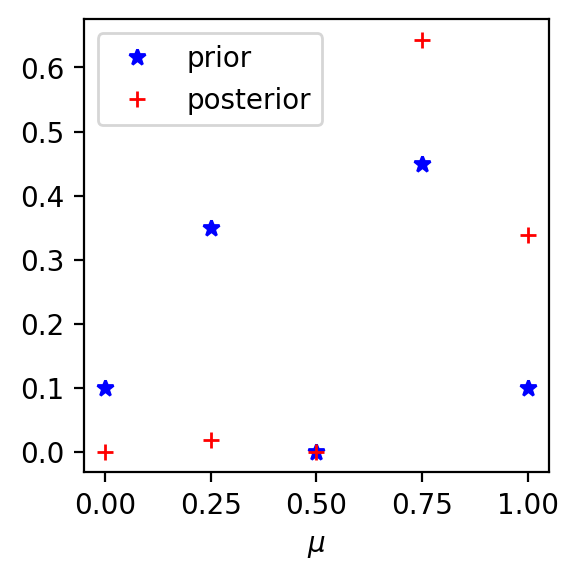

In [ ]:
#! Sample answer

n_ones = sample.sum()

mu_values = np.array([0., 0.25, 0.5, 0.75, 1.])
prior   = np.array([0.1, 0.35,   0.0, 0.45,  0.1])

llh = likelihood(mu_values,ones,zeros)
posterior = np.multiply(llh,prior)
normalised_posterior = posterior/posterior.sum()

plt.plot(mu_values, prior,'b*',label='prior')
plt.plot(mu_values,normalised_posterior,'r+',label='posterior')
plt.xlabel('$\mu$')
plt.legend()
plt.savefig('falsecoin.pdf')

# The point here is that if the prior probability is 0, no amount of observations can make it deviate from 0. 
# This is useful when modelling constraints, e.g. masses should never be negative 